import modules


In [9]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [7]:
x_train = x_train /255.0
x_test = x_test /255.0

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

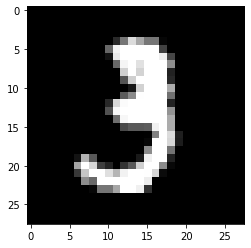

In [14]:
img = x_train[10]
plt.imshow(img , cmap='gray')
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2548 - accuracy: 0.9245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1171 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0853 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9872
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.02

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9779
0.9779000282287598


Training data accuracy = 99%
  Testing data accuracy = 97%

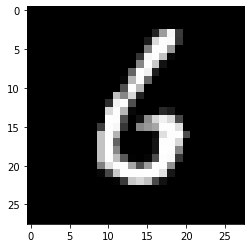

In [23]:
plt.imshow(x_test[50], cmap='gray')
plt.show()

In [24]:
y_pred = model.predict(x_test)
label = np.argmax(y_pred[50])
print(label)

313/313 [==============================] - 0s 2ms/step
6


In [25]:
import cv2 as cv 
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 20ms/step


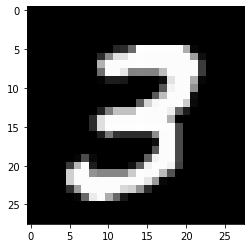

The Handwritten Digit is recognised as  3


In [28]:
img_path = '/content/img.png'
img = cv.imread(img_path)
gray_img = cv.cvtColor(img , cv.COLOR_RGB2GRAY)
gray_img = cv.resize(gray_img,(28,28))
reshaped_img = np.reshape(gray_img,[1,28,28])
prediction = model.predict(reshaped_img)
label = np.argmax(prediction)
plt.imshow(gray_img,cmap='gray')
plt.show()
print('The Handwritten Digit is recognised as ', label)